In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [3]:
dataset = pd.read_csv('btc-usd-max.csv', parse_dates = True)
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace = True)
prices = pd.DataFrame(dataset['price'])
print(dataset)

                    price    market_cap  total_volume
Date                                                 
2013-04-28     135.300000  1.500518e+09  0.000000e+00
2013-04-29     141.960000  1.575032e+09  0.000000e+00
2013-04-30     135.300000  1.501657e+09  0.000000e+00
2013-05-01     117.000000  1.298952e+09  0.000000e+00
2013-05-02     103.430000  1.148668e+09  0.000000e+00
...                   ...           ...           ...
2025-01-24  104067.609912  2.062361e+12  1.024552e+11
2025-01-25  104835.192536  2.076157e+12  5.141879e+10
2025-01-26  104796.040777  2.077648e+12  2.274074e+10
2025-01-27  102552.248743  2.036324e+12  2.063982e+10
2025-01-28  101958.469537  2.019296e+12  9.319164e+10

[4292 rows x 3 columns]


In [5]:
# Adding Moving Average as a feature
dataset['MA_30'] = dataset['price'].rolling(window=30).mean()  # 30-day moving average


In [ ]:
# Drop missing values or interpolate
dataset = dataset.dropna() 

# Splitting the dataset (80% training, 20% testing)
train_size = int(len(dataset) * 0.8)
train, test = dataset[:train_size], dataset[train_size:]


In [7]:

# Prepare features and labels
X = dataset[['price', 'MA_30']]  # Add more features as needed
y = dataset['price'].shift(-30)  # Target: Price 30 days ahead

# Drop the last 30 rows because they will have NaN values in target
X = X[:-30]
y = y.dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 14429.588171979181


In [9]:
# Making a prediction for the next month (30 days ahead)
future_features = dataset[['price', 'MA_30']].iloc[-30:]  # Last 30 days
future_prediction = model.predict(future_features)
print(f"Predicted price for the next month: {future_prediction[-1]}")

Predicted price for the next month: 48255.04745858626


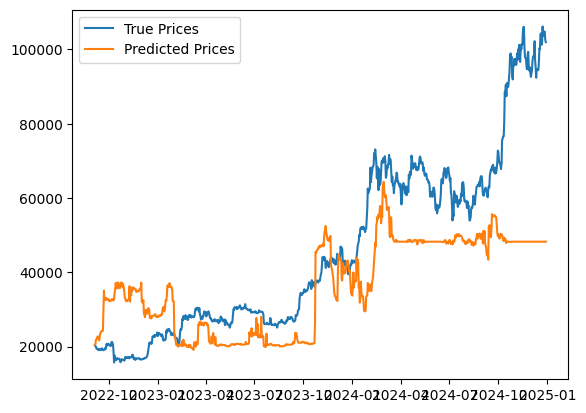

In [10]:
import matplotlib.pyplot as plt

plt.plot(y_test.index, y_test, label='True Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices')
plt.legend()
plt.show()